#  Building Visualization

---



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.


In [428]:
# Use the following data for this assignment:
from tabulate import tabulate
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import seaborn
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
print(df.T.describe())

                1992           1993           1994           1995
count    3650.000000    3650.000000    3650.000000    3650.000000
mean    33312.107476   41861.859541   39493.304941   47743.550969
std    200630.901553   98398.356203  140369.925240   69781.185469
min   -717071.175466 -321586.023683 -450827.613097 -189865.963265
25%   -102740.398364  -26628.302213  -57436.397393    1774.555612
50%     29674.931050   43001.976658   41396.781369   49404.322978
75%    167441.838695  108296.577923  137261.713785   94164.333867
max    817505.608159  395586.505068  490091.665037  320826.888044


In [429]:

%matplotlib inline
style = seaborn.axes_style("whitegrid")
style["axes.grid"] = False
seaborn.set_style("whitegrid", style)


|       |      1992 |      1993 |      1994 |       1995 |
|-------+-----------+-----------+-----------+------------|
| count |    3650   |    3650   |    3650   |    3650    |
| mean  |   33312.1 |   41861.9 |   39493.3 |   47743.6  |
| std   |  200631   |   98398.4 |  140370   |   69781.2  |
| min   | -717071   | -321586   | -450828   | -189866    |
| 25%   | -102740   |  -26628.3 |  -57436.4 |    1774.56 |
| 50%   |   29674.9 |   43002   |   41396.8 |   49404.3  |
| 75%   |  167442   |  108297   |  137262   |   94164.3  |
| max   |  817506   |  395587   |  490092   |  320827    |


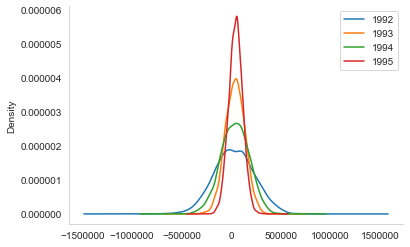

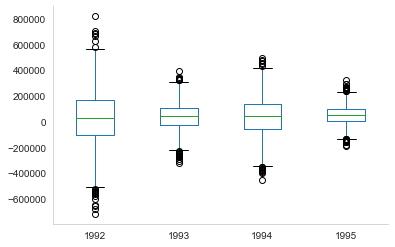

In [430]:
description = df.T.describe()
print(tabulate(description, headers="keys", tablefmt="orgtbl"))

df.T.plot.kde()
seaborn.despine()

df.T.plot.box()
seaborn.despine()

In [431]:
class IntervalCheck(object):
    """colors plot based on whether a value is in range
    Args:
     data (DataFrame): frame with data of interest as columns
     confidence_interval (float): probability we want to exceed
    """
    def __init__(self, data, confidence_interval=0.95, title="Confidence Intervals"):
        self.data = data
        self.confidence_interval = confidence_interval
        self.title = title
        self._intervals = None
        self._lows = None
        self._highs = None
        self._errors = None
        self._means = None
        self._errors = None
        self._figure = None
        self._axes = None
        self._bars = None
        self.horizontal_line = None
        self.line_label = None
        return
    
    @property
    def figure(self):
        if self._figure is None:
            """A pyplot figure"""
            self._figure = pyplot.figure()
        return self._figure
    
    @property
    def axes(self):
        if self._axes is None:
            """the current axes for self.figure"""
            self._axes = self.figure.gca()
            self._axes.set_title(self.title)
        return self._axes
    
    @property
    def bars(self):
        """the bar-plot-objects"""
        if self._bars is None:
            self._bars = self.axes.bar(self.data.columns, self.means, 
                                       yerr=self.errors)
        return self._bars

    @property
    def intervals(self):
        """list of high and low interval tuples"""
        if self._intervals is None:    
            data = (self.data[column] for column in self.data)
            self._intervals = [stats.norm.interval(alpha=self.confidence_interval,
                                                   loc=datum.mean(),
                                                   scale=datum.sem())
                               for datum in data]
        return self._intervals

    @property
    def lows(self):
        """the low-ends for the confidence intervals
        Returns:
         numpy.array of low-end confidence interval values
        """
        if self._lows is None:
            self._lows = numpy.array([low for low, high in self.intervals])
        return self._lows

    @property
    def highs(self):
        """high-ends for the confidence intervals
        Returns:
         numpy.array of high-end values for confidence intervals
        """
        if self._highs is None:
            self._highs = numpy.array([high for low, high in self.intervals])
        return self._highs

    @property
    def means(self):
        """the means of the data-arrays"""
        if self._means is None:
            self._means = self.data.mean()
        return self._means

    @property
    def errors(self):
        """The size of the errors, rather than the ci values"""
        if self._errors is None:
            self._errors = self.highs - self.means
        return self._errors

    def print_intervals(self):
        """print org-mode formatted table of the confidence intervals"""
        intervals = pandas.DataFrame({column: self.intervals[index]
                                      for index, column in enumerate(self.data.columns)},
                                     index="low high".split())
        try:
            print(tabulate(intervals, tablefmt="orgtbl", headers="keys"))
        except NameError:
            # not supported
            pass
        return
    
    def draw_value(self, value):
        """draws the horizontal line and value"""
        if self.horizontal_line:
            self.horizontal_line.set_ydata(value)
            self.line_label.set_y(value)
            self.line_label.set_text("{0}".format(value))
        else:
            self.horizontal_line = pyplot.axhline(value, 
                                                    axes=self.axes,
                                                    color="darkorange")
            self.line_label = pyplot.text(self.data.columns[3], 
                                          value,
                                          "{0}".format(value),
                                          axes=self.axes,
                    bbox={"facecolor": "white", "boxstyle": "round"})
        return

    def setup_bars(self, value):
        """sets up the horizontal line, value and bars
        Args:
         value (float): value to compare to distributions
        """
        x_labels = [str(index) for index in self.data.columns]
        for bar in self.bars:
            bar.set_edgecolor("royalblue")
        pyplot.xticks(self.data.columns, x_labels)
        self.draw_value(value)
        return

    def color_bars(self, value):
        """colors the bars based on the value
        this is the easiest case
        Args:
         value (float): value to compare to the distribution
        """
        for index, bar in enumerate(self.bars):
            if value < self.lows[index]:
                bar.set_color('crimson')
            elif self.lows[index] <= value <= self.highs[index]:
                bar.set_color('w')
                bar.set_edgecolor("royalblue")
            else:
                bar.set_color("royalblue")
        return

        
    def __call__(self, value):
        """plots the data and value
        * blue bar if value above c.i.
        * white bar if value in c.i.
        * red bar if value is below c.i.

        Args:
         value (float): what to compare to the data
        """
        self.setup_bars(value)
        self.color_bars(value)
        return
    
plotter = IntervalCheck(data=df.T)
plotter.print_intervals()

|      |    1992 |    1993 |    1994 |    1995 |
|------+---------+---------+---------+---------|
| low  | 26803.3 | 38669.7 | 34939.5 | 45479.7 |
| high | 39820.9 | 45054.1 | 44047.1 | 50007.4 |


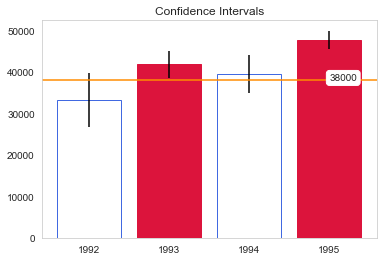

In [432]:
value = 38000
plotter(value )

In [433]:
class Harder(IntervalCheck):
    """implements the harder problem
    Uses a gradient instead of just 3 colors
    """
    def __init__(self, *args, **kwargs):
        super(Harder, self).__init__(*args, **kwargs)
        self._colors = None
        self._proportions = None
        return

    @property
    def colors(self):
        """array of rgb color triples"""
        if self._colors is None:
            # could have been done with straight fractions
            # but I find it easier to think in terms of
            # 0..255
            base = list(range(0, 255, 51))
            full = [255] * 6
            blue = numpy.array(base + full)
            blue = blue/255
            base.reverse()
            red = numpy.array(full + base)
            red = red/255
            tail = base[:]
            base.reverse()
            green = numpy.array(base + [255] + tail)/255
            self._colors = numpy.array([red, green, blue]).T
        return self._colors


    @property
    def proportions(self):
        """array of upper limits for the value to find the matching color
        """
        if self._proportions is None:
            self._proportions = numpy.linspace(0.09, 1, 10)
        return self._proportions

    def color_bars(self, value):
        """colors the bars based on the value
        this is the harder case
        Args:
         value (float): value to compare to the distribution
        """
        mapped_values = [(value - low)/(high - low)
                         for low, high in self.intervals]
        for index, mapped_value in enumerate(mapped_values):
            if mapped_value < 0:
                self.bars[index].set_color(self.colors[0])
                continue
            if mapped_value >= 1:
                self.bars[index].set_color(self.colors[-1])
                continue
            for p_index, proportion in enumerate(self.proportions):
                if mapped_value <= proportion:
                    color = self.colors[p_index]
                    self.bars[index].set_color(color)
                    self.bars[index].set_edgecolor("royalblue")
                    break
        return
plotter2 = Harder(data=df.T)
plotter2.print_intervals()

|      |    1992 |    1993 |    1994 |    1995 |
|------+---------+---------+---------+---------|
| low  | 26803.3 | 38669.7 | 34939.5 | 45479.7 |
| high | 39820.9 | 45054.1 | 44047.1 | 50007.4 |


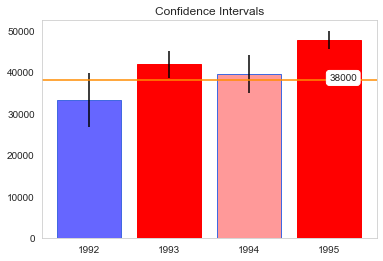

In [434]:
value = 38000
plotter2(value)

In [435]:
class EvenHarder(Harder):
    """the interactive version of Harder"""
    @property
    def figure(self):
        """pyplot figure
        As a side-effect registers on_click with the canvas
        """
        if self._figure is None:
            self._figure = pyplot.figure()
            self._figure.canvas.mpl_connect("button_press_event",
                                           self.on_click)
        return self._figure
    
    def on_click(self, event):
        """event-handler to update the plot"""
        if event.ydata:
            self.draw_value(event.ydata)
            self.color_bars(event.ydata)
        return
    def __call__(self, value=0):
        """add a default value since this is interactive"""
        super(EvenHarder, self).__call__(value)
        return

In [436]:
plotter3 = EvenHarder(data=df.T)
plotter3.print_intervals()

|      |    1992 |    1993 |    1994 |    1995 |
|------+---------+---------+---------+---------|
| low  | 26803.3 | 38669.7 | 34939.5 | 45479.7 |
| high | 39820.9 | 45054.1 | 44047.1 | 50007.4 |


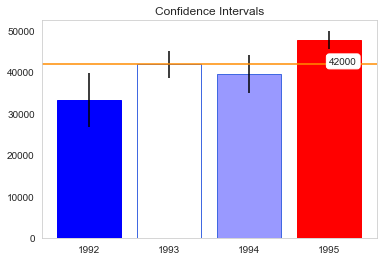

In [437]:
value = 42000
plotter3(value)